In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mbti-type/mbti_1.csv


**MBTI Personality prediction**

1. **SATYA SHAH-1002161494**
1. **VRAJ PATEL-1002166096**
1. **DEVARSH VORA-1002159763**

In [59]:
mbti_df = pd.read_csv("../input/mbti-type/mbti_1.csv")

In [95]:
# selected_types = ['INFP', 'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP']
# data = data[data['type'].isin(selected_types)]
# personality_types = ['INFP', 'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENTJ', 'ENFP', 'ENFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP',
#                      'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ']



In [60]:
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


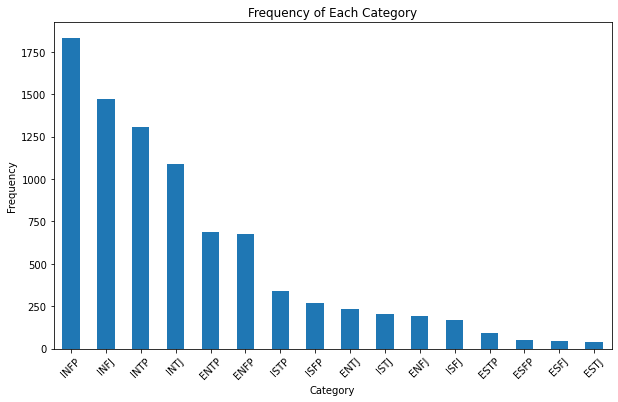

In [40]:
#Highly unbalanced dataset
import matplotlib.pyplot as plt


value_counts = mbti_df['type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Frequency of Each Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The first thing I want to do is turn the personality types into numbered categories, ranging from 0 to 15. These will serve as the output of the model when it is categorizing people.

In [41]:
# Extracting unique class labels from the 'type' column of the mbti_df DataFrame
# This step identifies all distinct personality types present in the dataset
# The resulting 'types' array will contain each unique type label found in the 'type' column,
# which is useful for understanding the variety of classes and possibly for mapping them to numeric indices later on
types = np.unique(mbti_df.type.values)

In [42]:
# Defining a function named get_type_index that takes a string as input
def get_type_index(string):
    # Convert the 'types' variable (assumed to be defined elsewhere) into a list and find the index of the input string
    return list(types).index(string)

# Applying the get_type_index function to each element in the 'type' column of the mbti_df DataFrame
# Assigning the result to a new column named 'type_index'
mbti_df['type_index'] = mbti_df['type'].apply(get_type_index)


In [43]:
mbti_df.posts.values[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [44]:
import string
import re

def clean_text(text):
    # Compiling a regex to match the '|' character and replace it with a space
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)

    # Splitting the text into words, convert each to lowercase, and append a space at the end
    cleanwords = str(text).split()
    cleanwords = [i.lower() + " " for i in cleanwords]

    # Removing any words that contain "http" to exclude URLs
    cleanwords = [i for i in cleanwords if not "http" in i]

    # Joining the list of words back into a single string
    cleanwords = " ".join(cleanwords)

    # Removing punctuation from the text using a translation table
    cleanwords = cleanwords.translate(cleanwords.maketrans('', '', string.punctuation))

    # Returns the cleaned text
    return cleanwords

# Applying the clean_text function to the 'posts' column of the dataframe
mbti_df['cleaned_text'] = mbti_df['posts'].apply(clean_text)


In [45]:
# Removing numbers, non-alphanumeric characters, and extra whitespaces from posts
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'[0-9\W_+]', ' ', x))

# Removing multiple whitespaces from posts
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'\s+', ' ', x))

In [46]:
mbti_df.cleaned_text.values[0]

'enfp  and  intj  moments  sportscenter  not  top  ten  plays  pranks  what  has  been  the  most  lifechanging  experience  in  your  life  on  repeat  for  most  of  today  may  the  perc  experience  immerse  you  the  last  thing  my  infj  friend  posted  on  his  facebook  before  committing  suicide  the  next  day  rest  in  peace  hello  enfj7  sorry  to  hear  of  your  distress  its  only  natural  for  a  relationship  to  not  be  perfection  all  the  time  in  every  moment  of  existence  try  to  figure  the  hard  times  as  times  of  growth  as  84389  84390    welcome  and  stuff  game  set  match  prozac  wellbrutin  at  least  thirty  minutes  of  moving  your  legs  and  i  dont  mean  moving  them  while  sitting  in  your  same  desk  chair  weed  in  moderation  maybe  try  edibles  as  a  healthier  alternative  basically  come  up  with  three  items  youve  determined  that  each  type  or  whichever  types  you  want  to  do  would  more  than  likely  us

**EXPLORATORY DATA ANALYSIS**

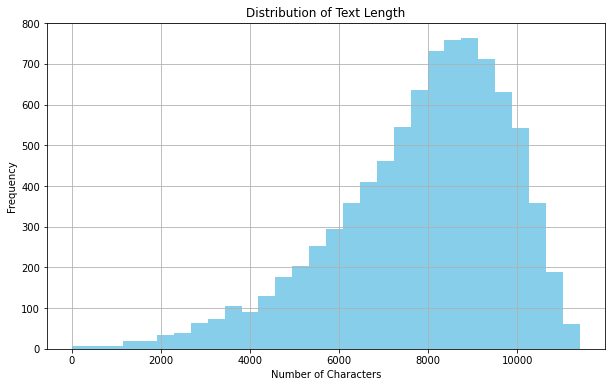

In [53]:
#Exploratory Data Analysis 
#Charcters histogram
#This shows that the length of characters in each sentence range from 2000 to 11500 approx and majority of the text in the data has characters ranging from 6000 to 10000 
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
mbti_df['cleaned_text'].str.len().hist(color='skyblue', bins=30) 
plt.title('Distribution of Text Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()



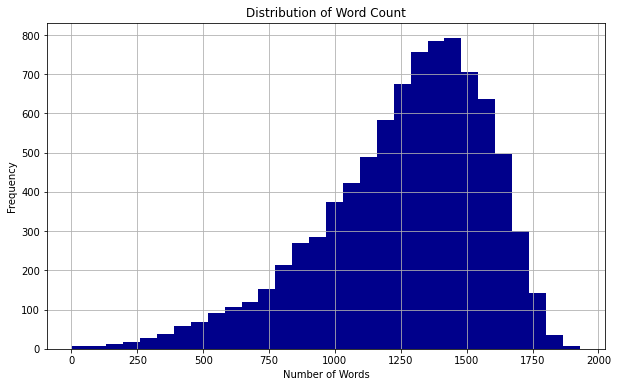

In [55]:
# Code Snippet for Word Number Histogram
#This shows that majority of text ranges from 1000 to 1500 words
import matplotlib.pyplot as plt

def plot_word_number_histogram(text):
    plt.figure(figsize=(10, 6))
    text.str.split().map(lambda x: len(x)).hist(color='darkblue', bins=30)  
    plt.title('Distribution of Word Count')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

plot_word_number_histogram(mbti_df['cleaned_text'])



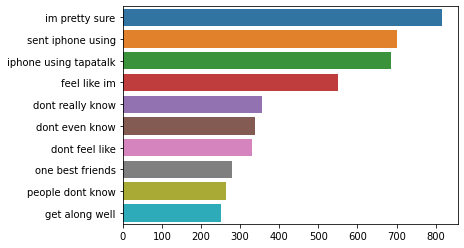

In [49]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def plot_top_ngrams_barchart(text, n=3):
    stop = set(stopwords.words('english'))

    # Filtering out stopwords from the text
    filtered_text = text.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop]))

    new = filtered_text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams = _get_top_ngram(filtered_text, n)[:10]
    x, y = map(list, zip(*top_n_bigrams))
    sns.barplot(x=y, y=x)

# Assuming mbti_df['cleaned_text'] contains the text data
plot_top_ngrams_barchart(mbti_df['cleaned_text'], 3)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


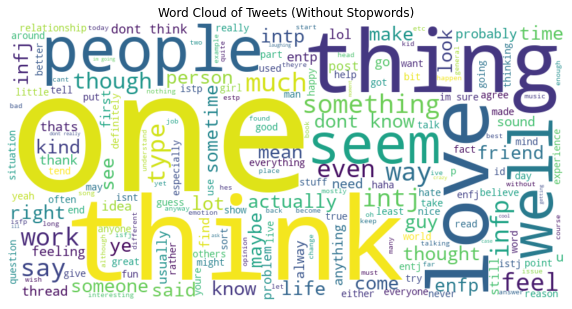

In [17]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Getting a set of stopwords
stop_words = set(stopwords.words('english'))

# Combining all text data into a single string
text_combined = " ".join(text for text in mbti_df.cleaned_text)

# Removing stopwords from the text
filtered_text = ' '.join(word for word in text_combined.split() if word.lower() not in stop_words)

# Generating word cloud with filtered text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets (Without Stopwords)')
plt.show()


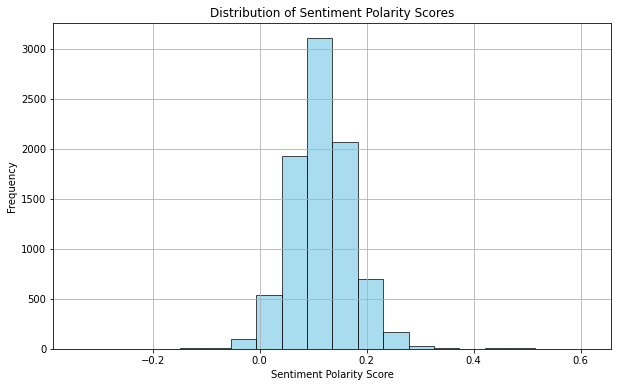

In [18]:
#This shows that majority of the posts are neutral in this dataset
from textblob import TextBlob
import matplotlib.pyplot as plt

# Calculating sentiment polarity scores for each text
sentiment_scores = mbti_df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the histogram of sentiment polarity scores
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


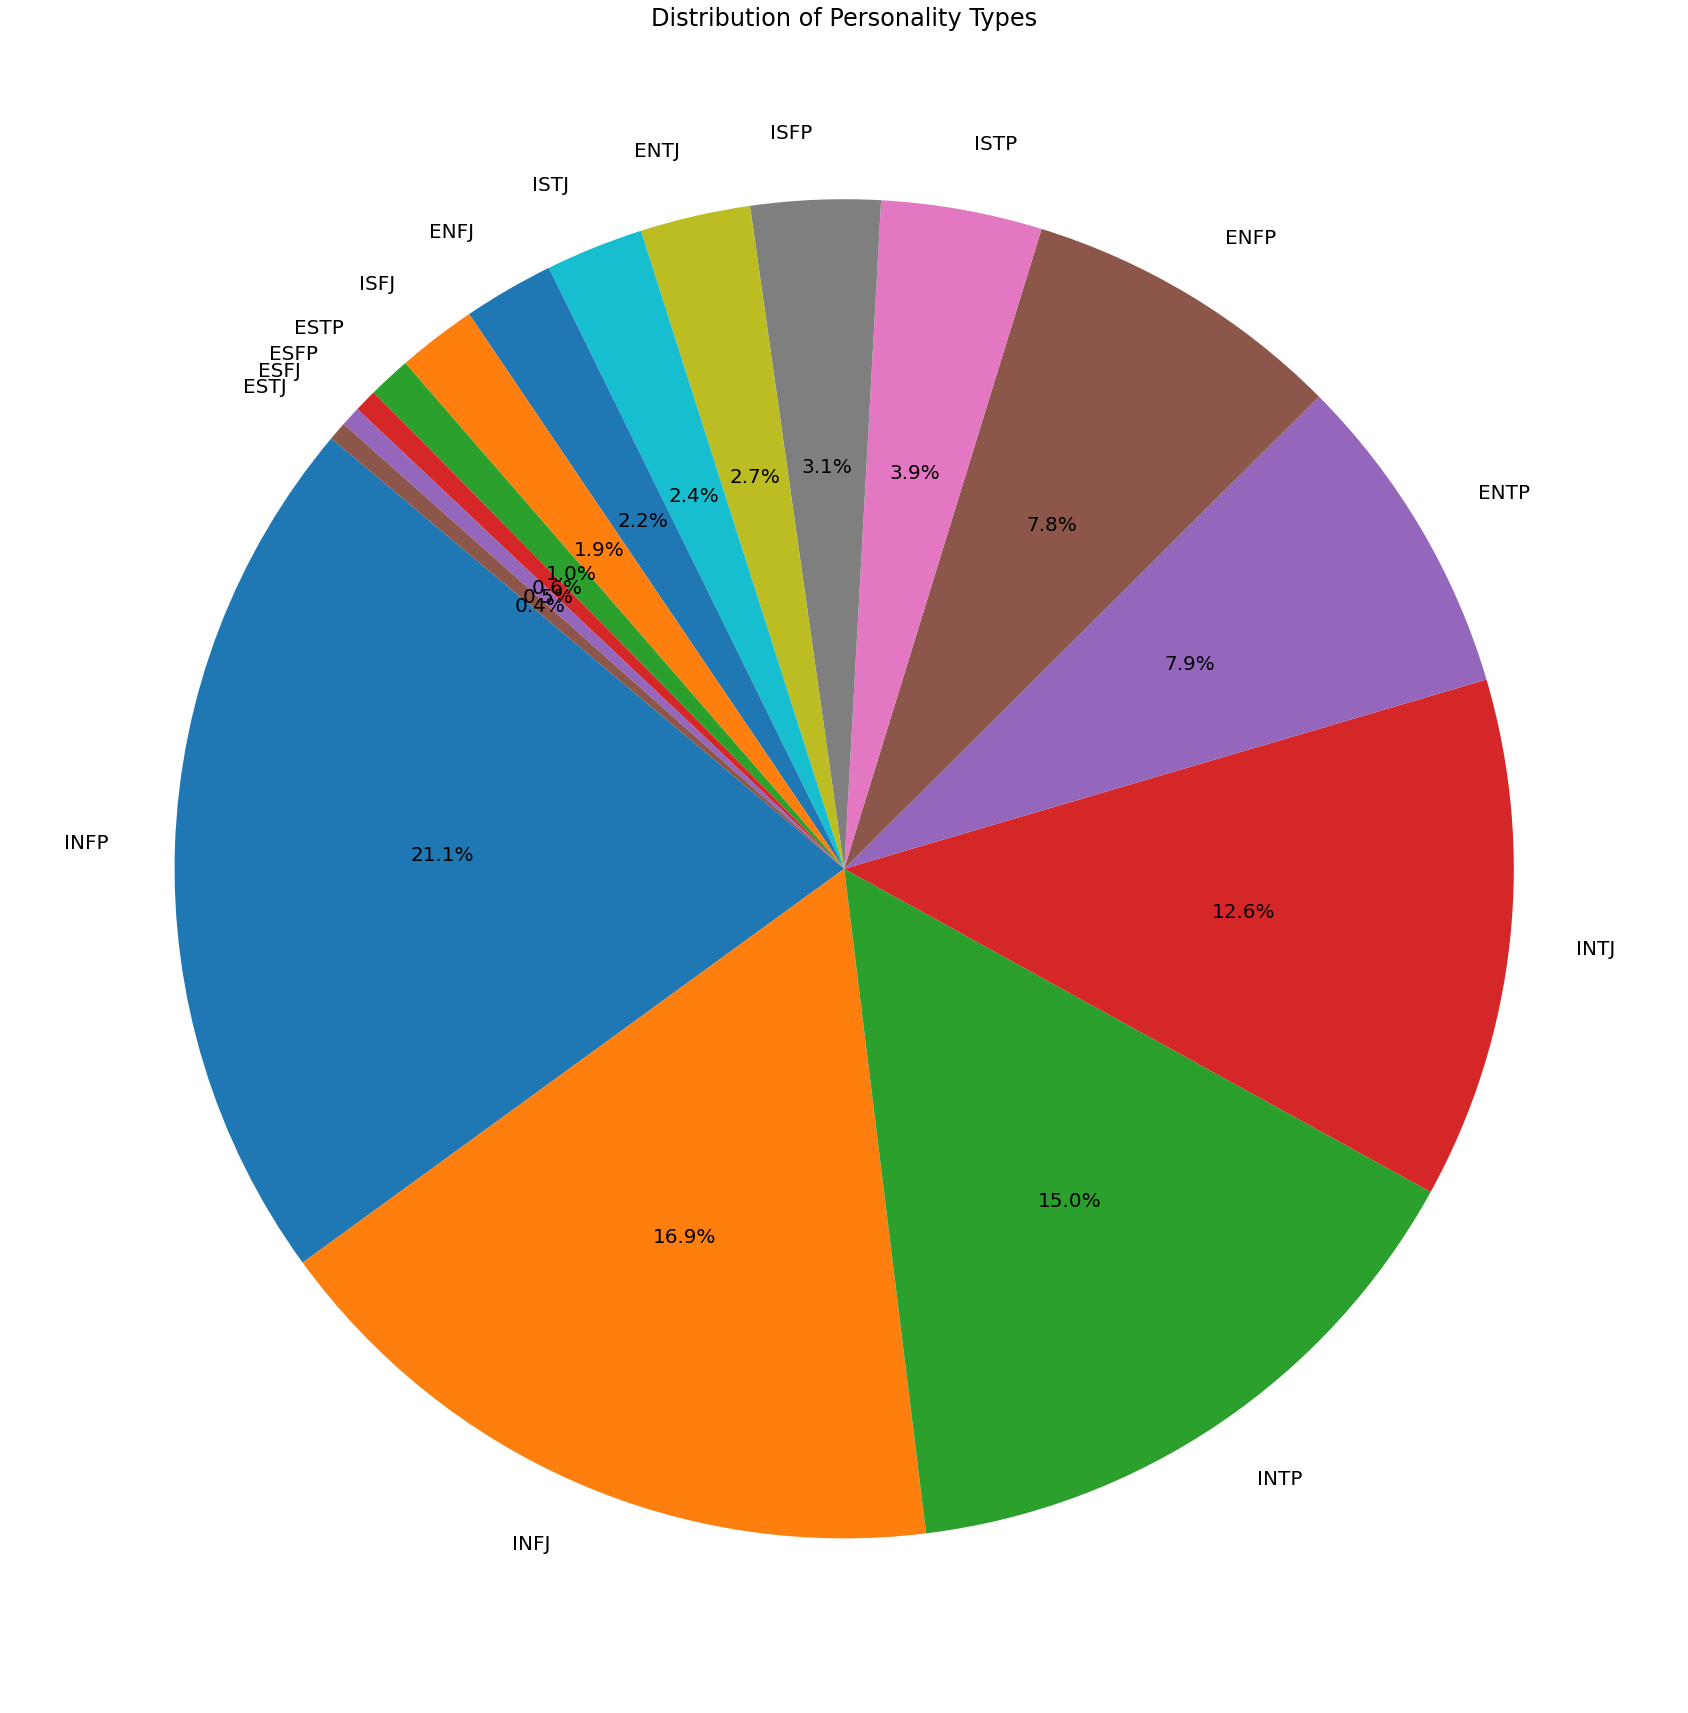

In [70]:
import matplotlib.pyplot as plt

# Calculate the frequency of each personality type
type_counts = mbti_df['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(30, 40))
type_counts.plot(kind='pie', autopct='%3.1f%%', startangle=140, fontsize=20)  # Adjust fontsize as needed
plt.title('Distribution of Personality Types', fontsize=24)  # Adjust title fontsize as needed
plt.ylabel('')
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


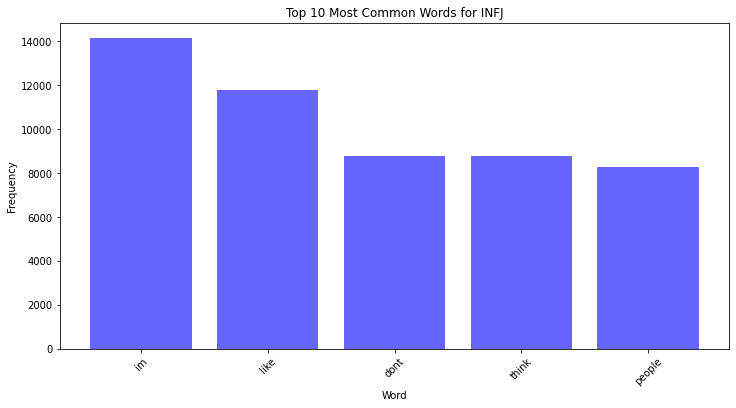

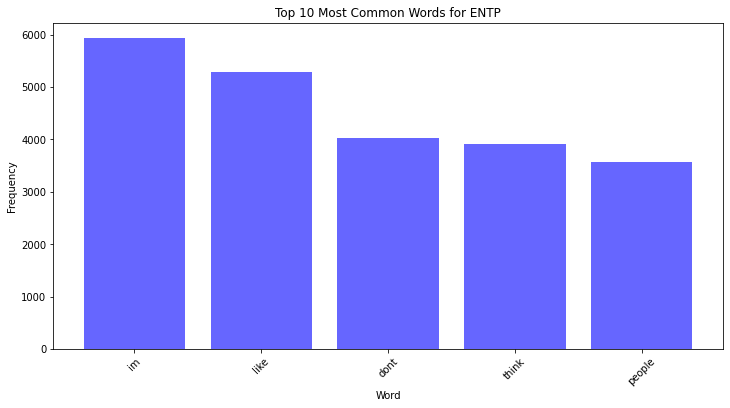

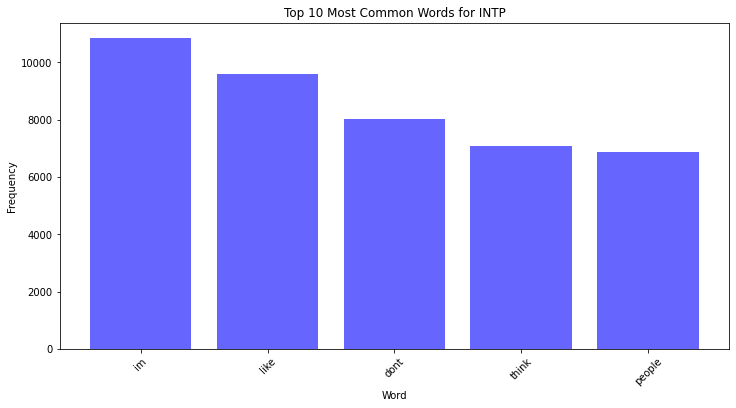

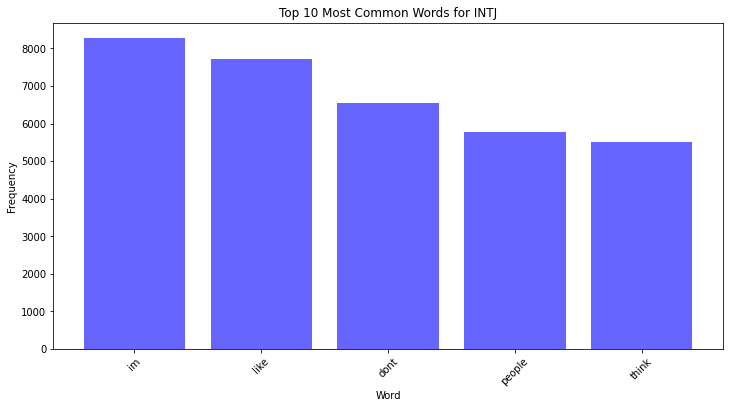

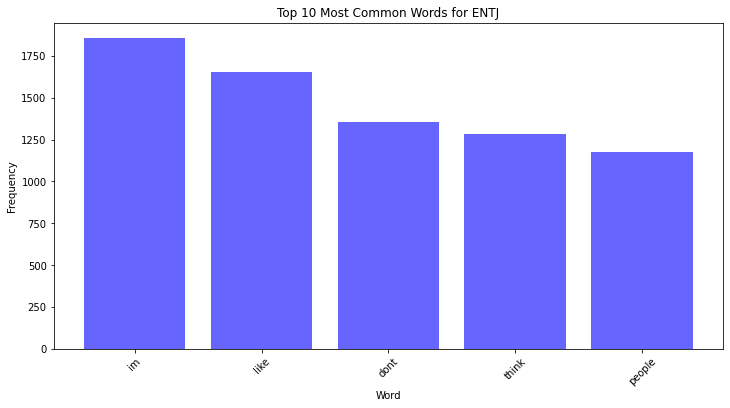

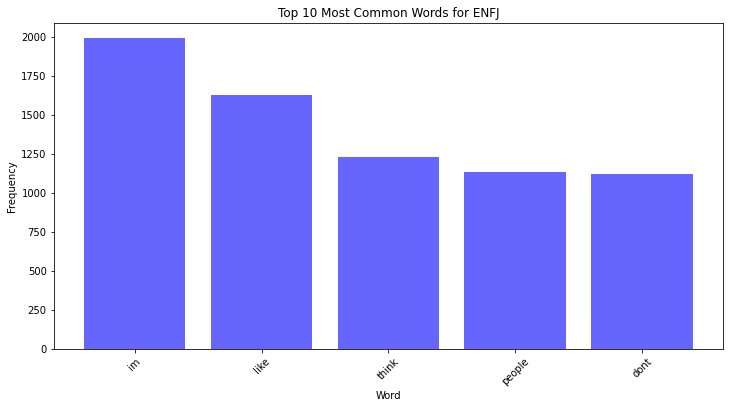

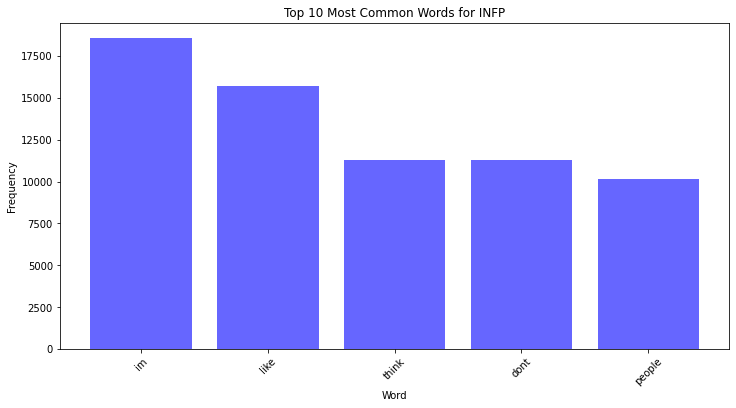

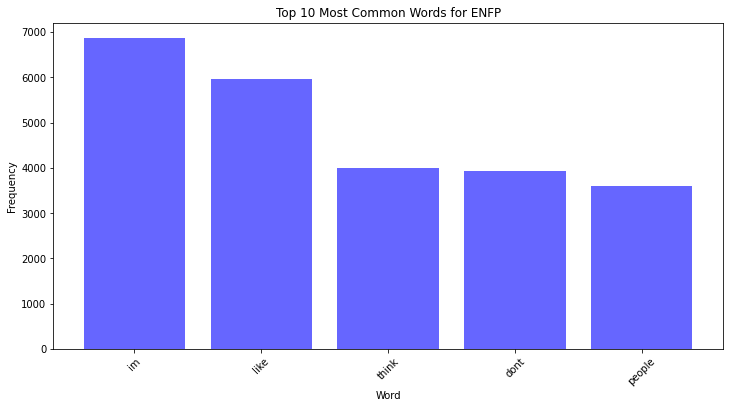

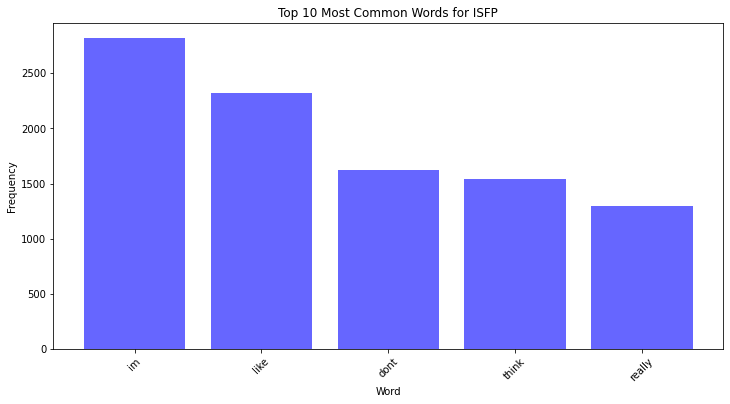

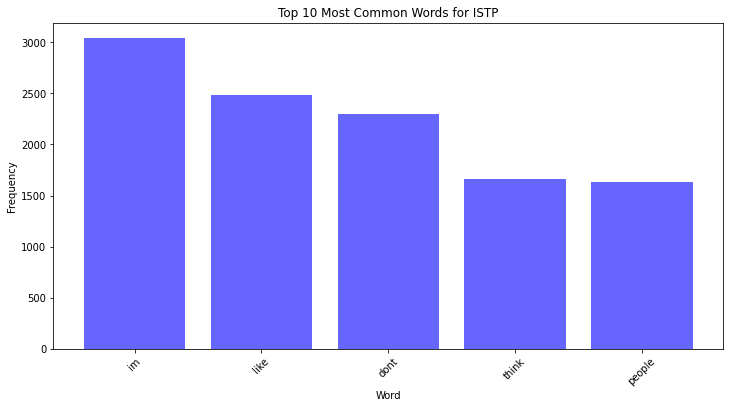

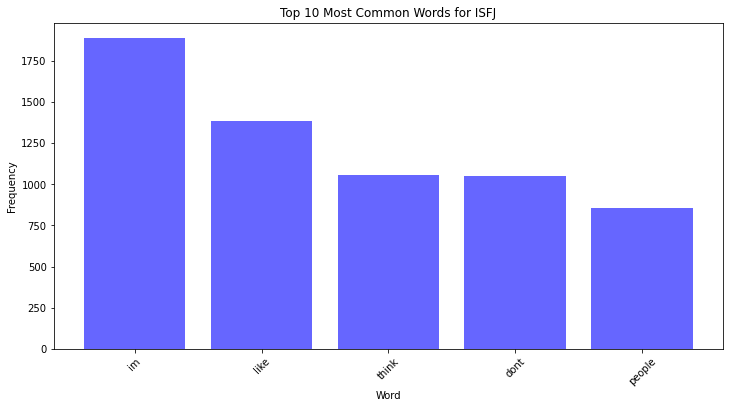

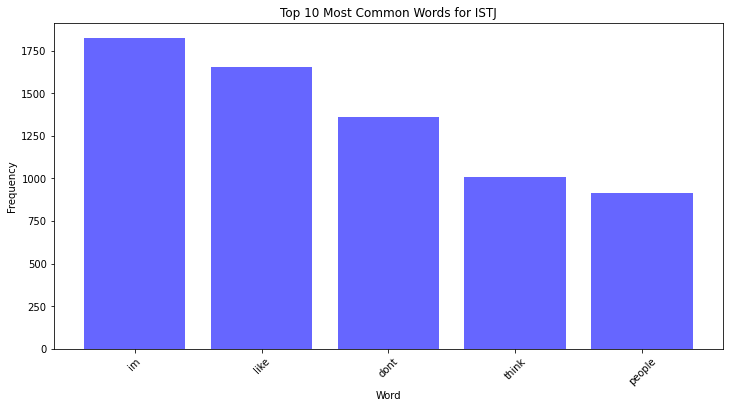

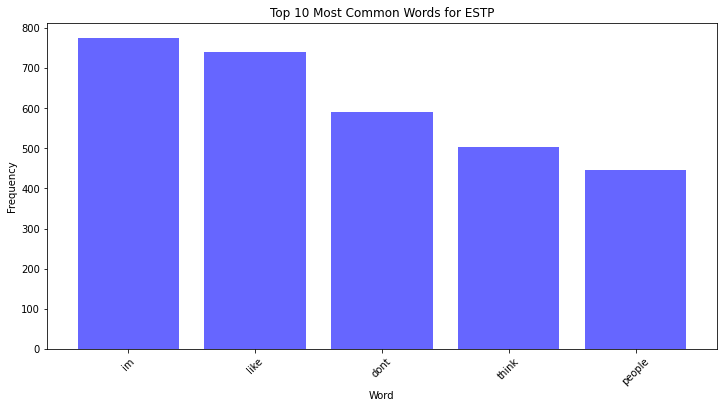

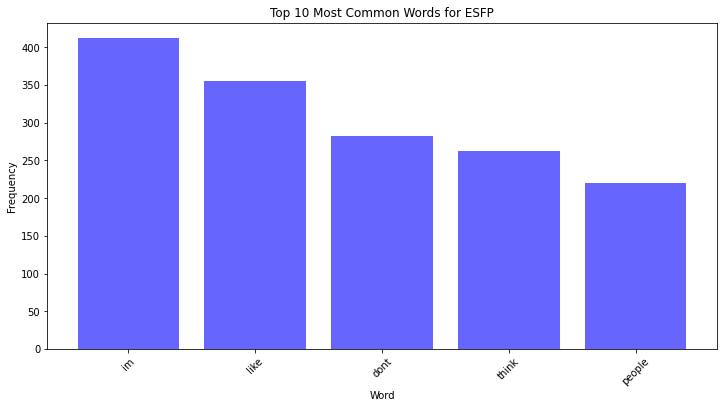

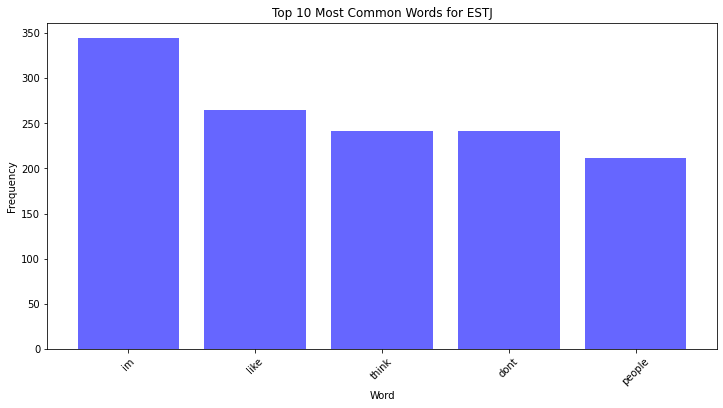

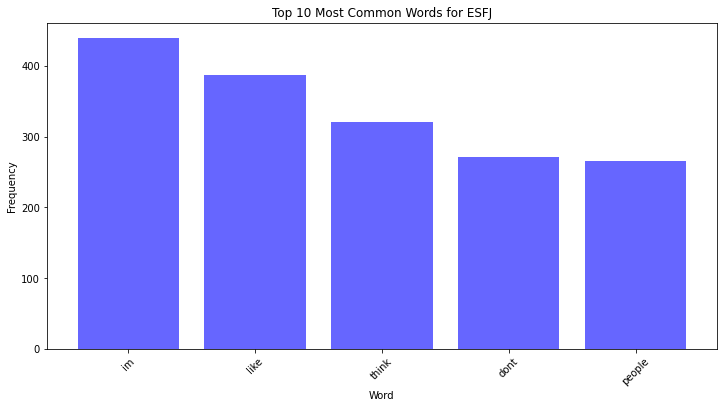

In [51]:
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Assuming mbti_df is your DataFrame containing personality types and cleaned_text column
# Define the list of personality types
personality_types = mbti_df['type'].unique()

# Define a function to plot the bar chart for a given personality type
def plot_top_words_per_personality(data, personality_type):
    stop_words = set(stopwords.words('english'))

    # Tokenize the text and remove stopwords for the given personality type
    personality_text = mbti_df[mbti_df['type'] == personality_type]['cleaned_text']
    words = [word for text in personality_text for word in text.split() if word.lower() not in stop_words]

    # Count word frequencies
    word_freq = Counter(words)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(*zip(*word_freq.most_common(5)), color='blue', alpha=0.6)
    plt.title(f'Top 10 Most Common Words for {personality_type}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Iterate over each personality type and plot the bar chart
for personality_type in personality_types:
    plot_top_words_per_personality(mbti_df, personality_type)


In [52]:
mbti_df.drop('type', axis=1, inplace=True)

mbti_df.head()

,posts,type_index,cleaned_text
0,http www youtube com watch v qsXHcwe krw http...,8,enfp and intj moments sportscenter not t...
1,I m finding the lack of me in these posts ver...,3,im finding the lack of me in these pos...
2,Good one https www youtube com watch v fHiGbo...,11,good one of course to which i say i ...
3,Dear INTP I enjoyed our conversation the othe...,10,dear intp i enjoyed our conversation the...
4,You re fired That s another silly misconcepti...,2,youre fired thats another silly misconcep...


**TRAINING THE BERT MODEL(bert-base-uncased)**

In [11]:
# Train validation Test split 75-20
from sklearn.model_selection import train_test_split

train, test = train_test_split(mbti_df)
train, validation = train_test_split(train)

In [12]:
import tensorflow as tf

# Converting label indices into one-hot encoded labels for training data
# 'train.type_index.values' contains integer indices of the classes
# 'num_classes=16' specifies that there are 16 different classes, 
one_hot_labels = tf.keras.utils.to_categorical(train.type_index.values, num_classes=16)

# Convert label indices into one-hot encoded labels for validation data
# Similarly, 'val.type_index.values' holds the class indices for the validation dataset
# The one-hot encoding will help in comparing predicted probabilities directly with true labels in classification tasks
validation_labels= tf.keras.utils.to_categorical(validation.type_index.values, num_classes=16)


In [ ]:
#Applying BERT model 
import transformers

#Using Bert base uncased 
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')


In [14]:
maxlen = 1500  # Maximum length of input sequences

# Tokenize and encode the training data with padding to a maximum length of 'maxlen'
train_input_ids = [tokenizer.encode(str(i), max_length=maxlen, pad_to_max_length=True) for i in train.cleaned_text.values]

# Tokenize and encode the validation data with padding to a maximum length of 'maxlen'
validation_input_ids = [tokenizer.encode(str(i), max_length=maxlen, pad_to_max_length=True) for i in validation.cleaned_text.values]


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [15]:
def create_model(): 
    # Defining input layer for word IDs with shape (batch_size, maxlen)
    input_word_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32,
                                           name="input_word_ids")
    
    # Loading pre-trained BERT model
    bert_layer = transformers.TFBertModel.from_pretrained('bert-base-uncased', from_pt=True)

    # Getting BERT outputs
    bert_outputs = bert_layer(input_word_ids)[0]
    
    # Extracting the representation of the [CLS] token (first token) and pass it to a dense layer
    pred = tf.keras.layers.Dense(16, activation='softmax')(bert_outputs[:,0,:])
    
    # Defining the model with input and output layers
    model = tf.keras.models.Model(inputs=input_word_ids, outputs=pred)
    
    # Defining loss function
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    # Compiling the model with Adam optimizer and metrics
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001), metrics=['accuracy'])
    
    return model


In [16]:
#Creating Model
model = create_model()
    
model.summary()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 1500)]            0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12304     
Total params: 109,494,544
Trainable params: 109,494,544
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size = 2 #Setting the batchsize for training

#Fitting the model
model.fit(np.array(train_input_ids), one_hot_labels,validation_data = (np.array(validation_input_ids), validation_labels),
          verbose = 1, epochs = 25, batch_size = batch_size,  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

Epoch 1/25
2440/2440 [==============================] - 3016s 1s/step - loss: 2.0074 - accuracy: 0.3400 - val_loss: 1.4089 - val_accuracy: 0.5827
Epoch 2/25
2440/2440 [==============================] - 3004s 1s/step - loss: 1.2504 - accuracy: 0.6235 - val_loss: 1.3182 - val_accuracy: 0.5950
Epoch 3/25
2440/2440 [==============================] - 3004s 1s/step - loss: 1.0755 - accuracy: 0.6704 - val_loss: 1.2097 - val_accuracy: 0.6374
Epoch 4/25
2440/2440 [==============================] - 3005s 1s/step - loss: 0.8829 - accuracy: 0.7297 - val_loss: 1.1910 - val_accuracy: 0.6693
Epoch 5/25
2440/2440 [==============================] - 3005s 1s/step - loss: 0.6792 - accuracy: 0.7985 - val_loss: 1.2552 - val_accuracy: 0.6681
Epoch 6/25
2440/2440 [==============================] - 3005s 1s/step - loss: 0.4800 - accuracy: 0.8590 - val_loss: 1.3700 - val_accuracy: 0.6730
Epoch 7/25
2440/2440 [==============================] - 3005s 1s/step - loss: 0.3346 - accuracy: 0.9016 - val_loss: 1.5340 -

In [18]:
# Tokenize and encode the test data with padding to a maximum length of 'maxlen'
test_input_ids = [tokenizer.encode(str(i), max_length = maxlen , pad_to_max_length = True) for i in test.cleaned_text.values]

# Converting test labels to one-hot encoding with 16 classes
test_labels= tf.keras.utils.to_categorical(test.type_index.values, num_classes=16)

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [19]:
# Evaluating the model on the test data

model.evaluate(np.array(test_input_ids), test_labels)

68/68 [==============================] - 396s 6s/step - loss: 1.4948 - accuracy: 0.6897


[1.4947601556777954, 0.6897187829017639]